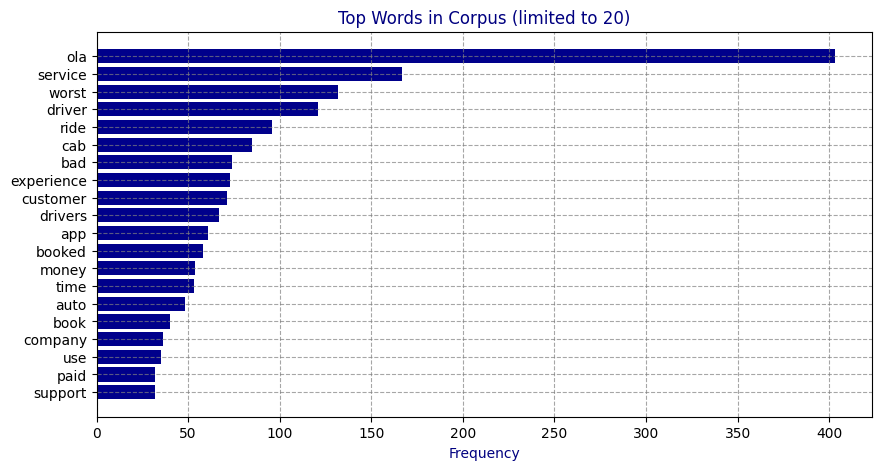

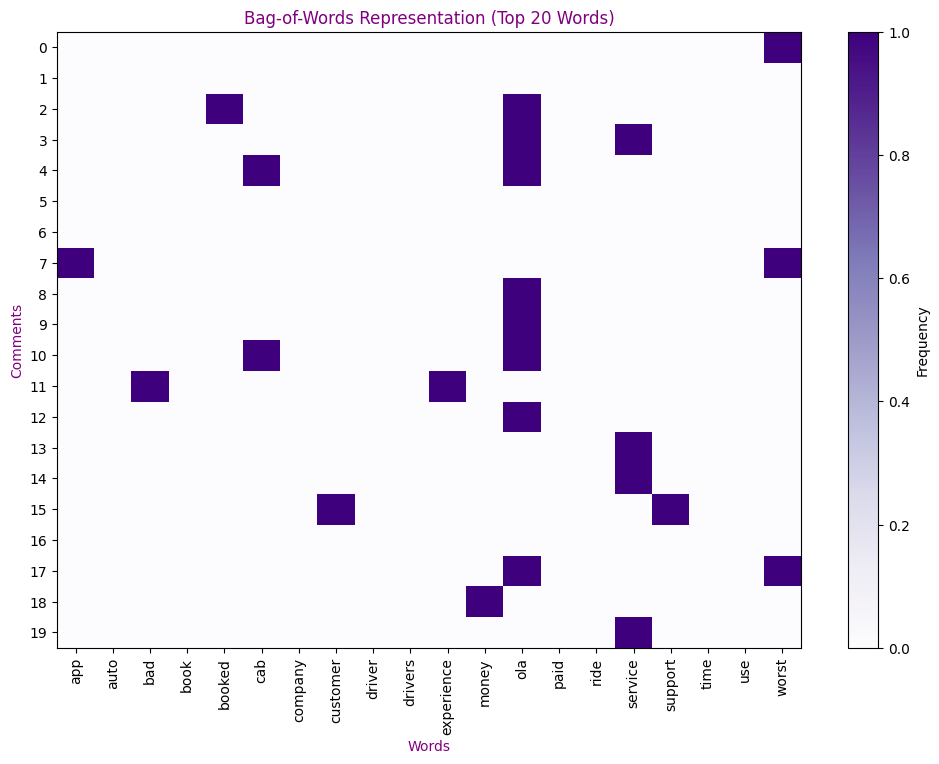

C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\382677373.py:59: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')


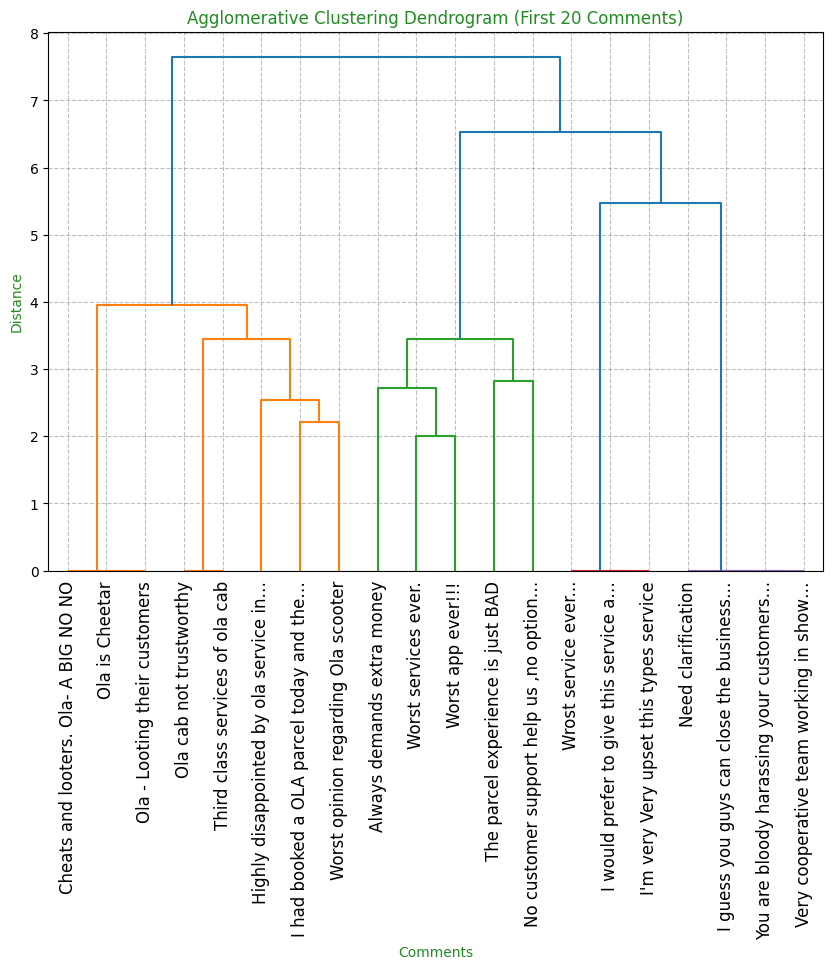

C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\382677373.py:70: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')


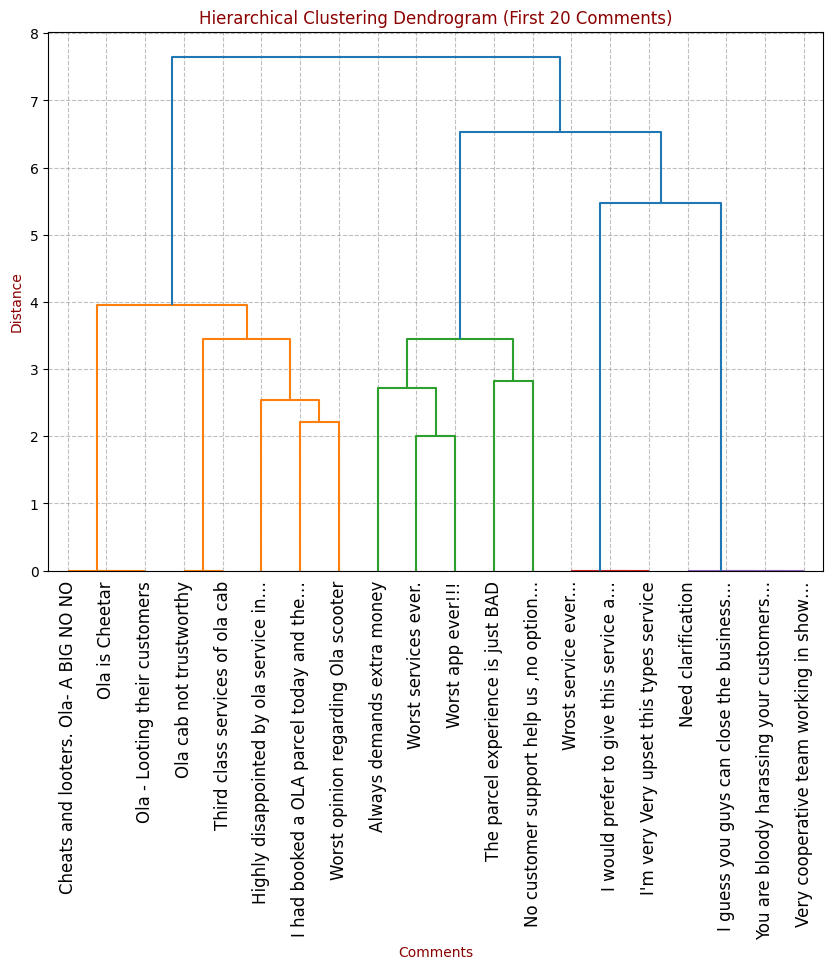

                                     Comment  agglo_cluster  \
0                       Worst services ever.            2.0   
1   You are bloody harassing your customers…            4.0   
2   I had booked a OLA parcel today and the…            1.0   
3     Highly disappointed by ola service in…            1.0   
4                    Ola cab not trustworthy            1.0   
5     Very cooperative team working in show…            4.0   
6   I guess you guys can close the business…            4.0   
7                          Worst app ever!!!            2.0   
8                             Ola is Cheetar            1.0   
9              Ola - Looting their customers            1.0   
10           Third class services of ola cab            1.0   
11         The parcel experience is just BAD            2.0   
12      Cheats and looters. Ola- A BIG NO NO            1.0   
13    I would prefer to give this service a…            3.0   
14    I'm very Very upset this types service           

In [1]:
#Part 1.2(Text Clustering and Visualization Using Bag-of-Words and Hierarchical Methods) for Ola dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel(r"C:\Users\prabi\OneDrive\Desktop\V sem\FDS_project\Datasets\Ola.xlsx")  # Replace with your actual file path

# Step 2: Handle NaN values in 'Comment' column
df['Comment'] = df['Comment'].fillna('')  # Replacing NaN with empty string

# Step 3: Create a bag-of-words representation (limit to the top 20 words)
comments = df['Comment']  # Assuming your comments are in a column named 'Comment'
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Limit to top 20 words
X = vectorizer.fit_transform(comments)

# Step 4: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization (limit to 20 words) ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(20)

# Plot top words with a new color scheme (Dark Blue palette)
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='darkblue')
plt.xlabel('Frequency', color='navy')
plt.title('Top Words in Corpus (limited to 20)', color='navy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity
plt.show()

# --- Bag-of-Words Visualization (limit to 20 words) ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df[:20], cmap='Purples', aspect='auto')  # Change color to purple shades
plt.colorbar(label='Frequency', orientation='vertical')
plt.title('Bag-of-Words Representation (Top 20 Words)', color='purple')
plt.xlabel('Words', color='purple')
plt.ylabel('Comments', color='purple')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(20), labels=df.index[:20])  # Limit to first 20 comments
plt.grid(False)  # Remove grid for this plot
plt.show()

# --- Agglomerative Clustering ---
# Step 5: Perform Agglomerative Clustering (use first 20 comments to reduce graph size)
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances[:20, :20])  # Limit clustering to first 20 comments

# Step 6: Plot Dendrogram for Agglomerative Clustering (first 20 comments)
linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Agglomerative Clustering Dendrogram (First 20 Comments)', color='forestgreen')
plt.xlabel('Comments', color='forestgreen')
plt.ylabel('Distance', color='forestgreen')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# --- Hierarchical Clustering ---
# Step 7: Perform Hierarchical Clustering and plot dendrogram (first 20 comments)
linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (First 20 Comments)', color='darkred')
plt.xlabel('Comments', color='darkred')
plt.ylabel('Distance', color='darkred')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = np.nan
df['hierarchical_cluster'] = np.nan

# Fill the cluster labels for the first 20 comments
df.loc[:19, 'agglo_cluster'] = clusters_agglo
df.loc[:19, 'hierarchical_cluster'] = clusters_hierarchical

# Print out the comments with their corresponding cluster labels for the first 20
print(df[['Comment', 'agglo_cluster', 'hierarchical_cluster']].head(20))


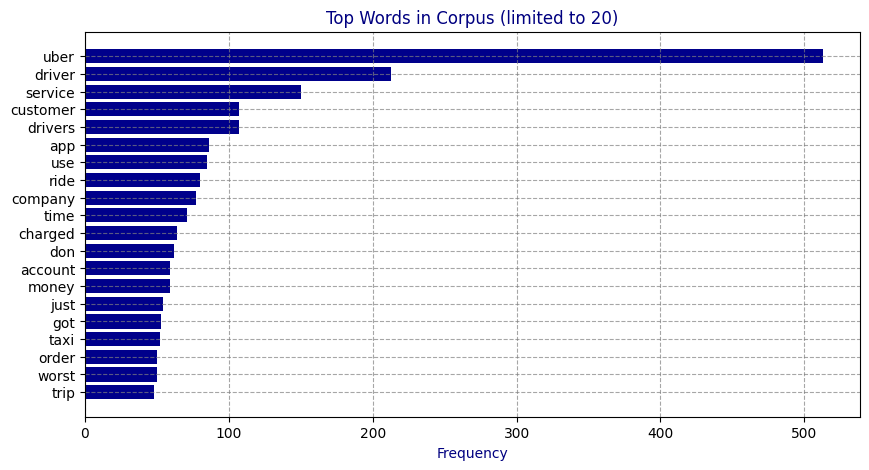

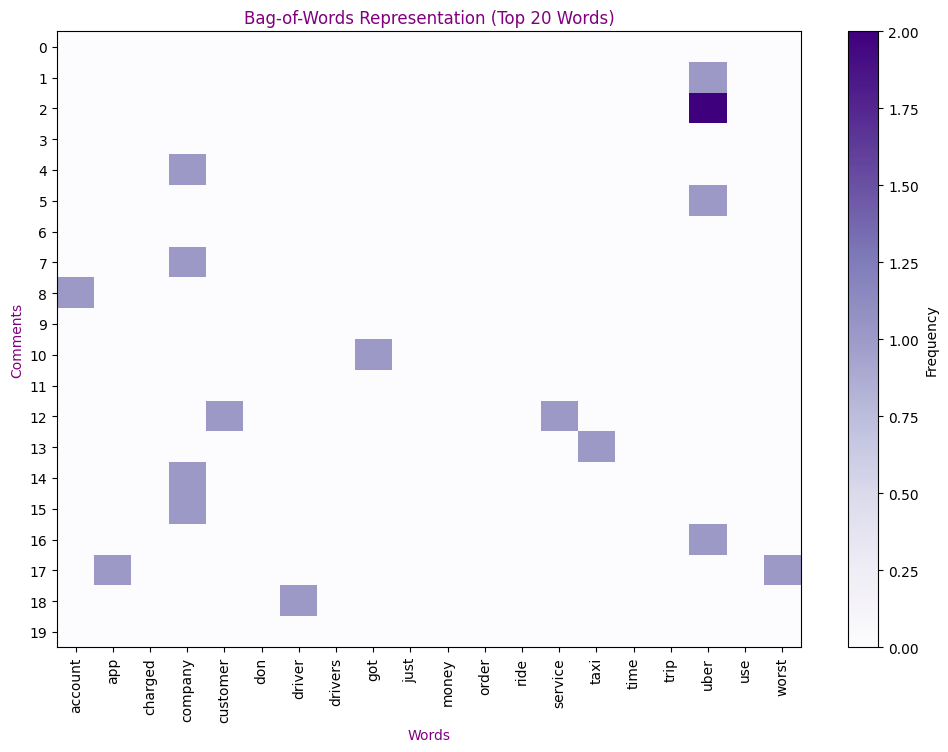

C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\699529330.py:60: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')


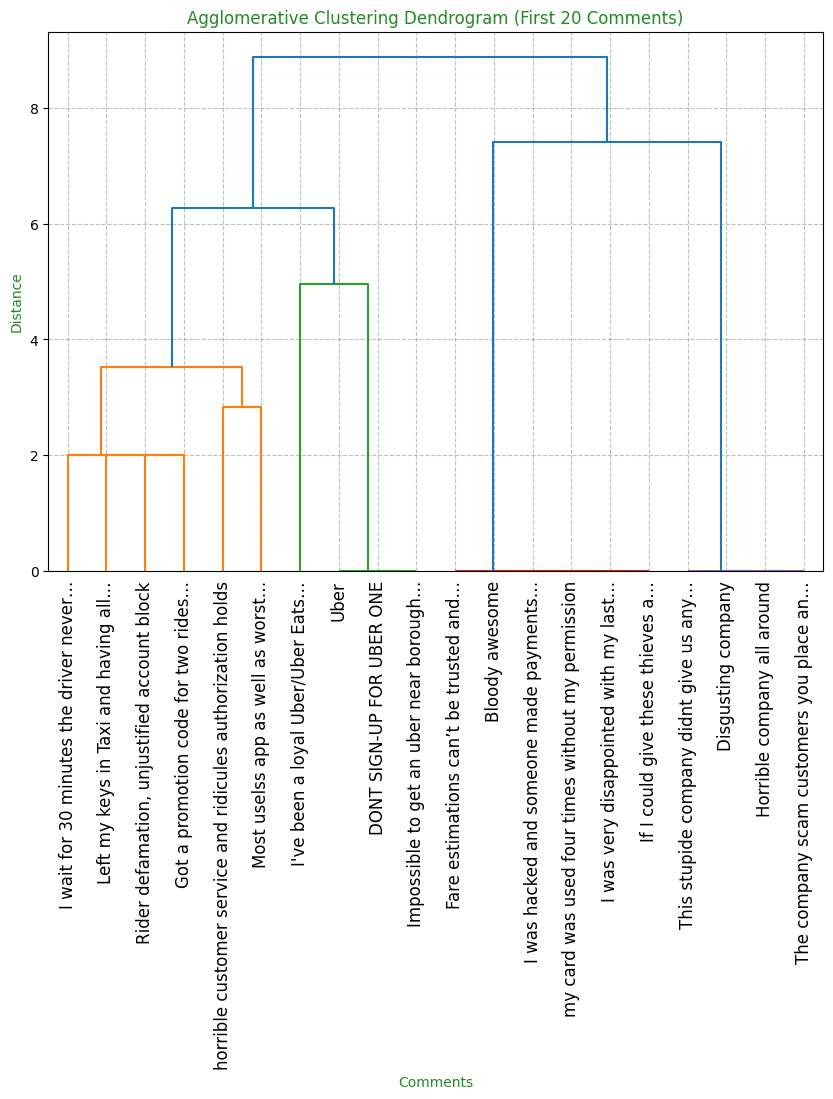

C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\699529330.py:71: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')


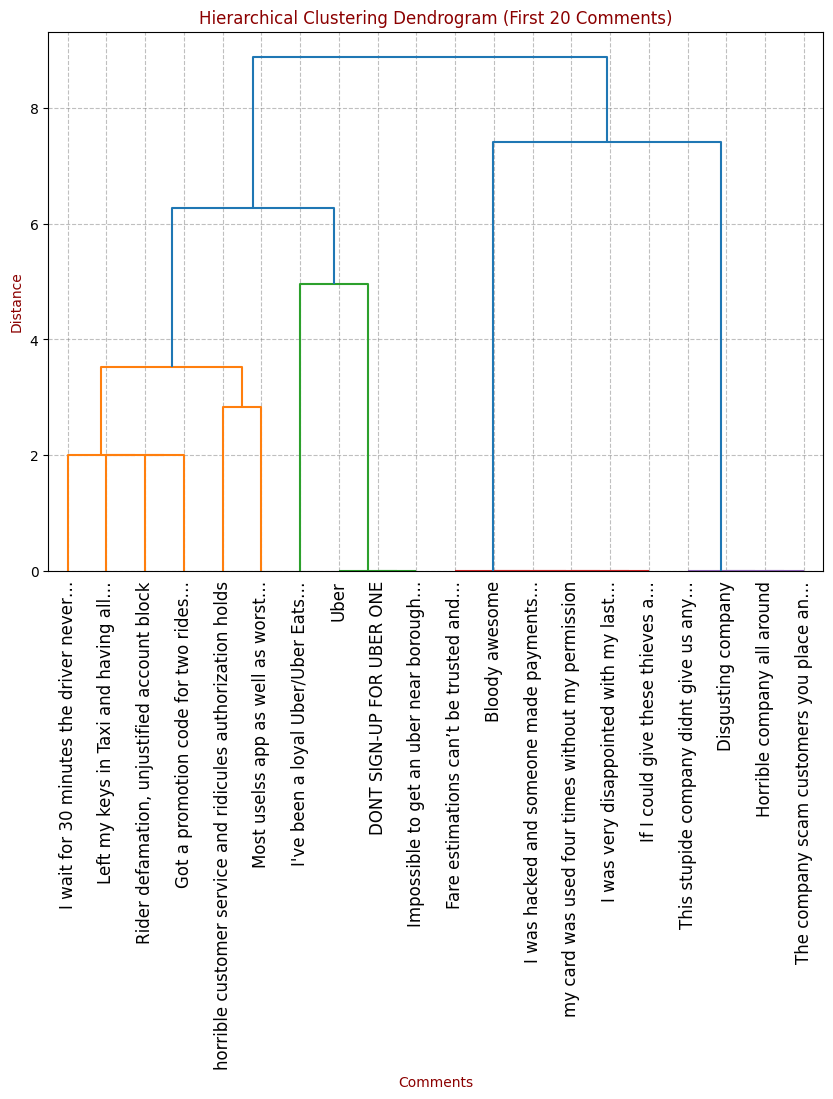

                                              Comment  agglo_cluster  \
0               I was very disappointed with my last…            3.0   
1                           DONT SIGN-UP FOR UBER ONE            2.0   
2                   I've been a loyal Uber/Uber Eats…            2.0   
3                    If I could give these thieves a…            3.0   
4                         Horrible company all around            4.0   
5             Impossible to get an uber near borough…            2.0   
6   my card was used four times without my permission            3.0   
7            The company scam customers you place an…            4.0   
8         Rider defamation, unjustified account block            1.0   
9             I was hacked and someone made payments…            3.0   
10                Got a promotion code for two rides…            1.0   
11                                     Bloody awesome            3.0   
12  horrible customer service and ridicules author...           

In [2]:
#Part 1.2(Text Clustering and Visualization Using Bag-of-Words and Hierarchical Methods) for uber dataset
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel(r"C:\Users\prabi\OneDrive\Desktop\V sem\FDS_project\Datasets\Uber.xlsx")  # Replace with your actual file path

# Step 2: Handle NaN values in 'Comment' column
df['Comment'] = df['Comment'].fillna('')  # Replacing NaN with empty string

# Step 3: Create a bag-of-words representation (limit to the top 20 words)
comments = df['Comment']  # Assuming your comments are in a column named 'Comment'
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Limit to top 20 words
X = vectorizer.fit_transform(comments)

# Step 4: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization (limit to 20 words) ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(20)

# Plot top words with a new color scheme (Dark Blue palette)
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='darkblue')
plt.xlabel('Frequency', color='navy')
plt.title('Top Words in Corpus (limited to 20)', color='navy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity
plt.show()

# --- Bag-of-Words Visualization (limit to 20 words) ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df[:20], cmap='Purples', aspect='auto')  # Change color to purple shades
plt.colorbar(label='Frequency', orientation='vertical')
plt.title('Bag-of-Words Representation (Top 20 Words)', color='purple')
plt.xlabel('Words', color='purple')
plt.ylabel('Comments', color='purple')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(20), labels=df.index[:20])  # Limit to first 20 comments
plt.grid(False)  # Remove grid for this plot
plt.show()

# --- Agglomerative Clustering ---
# Step 5: Perform Agglomerative Clustering (use first 20 comments to reduce graph size)
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances[:20, :20])  # Limit clustering to first 20 comments

# Step 6: Plot Dendrogram for Agglomerative Clustering (first 20 comments)
linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Agglomerative Clustering Dendrogram (First 20 Comments)', color='forestgreen')
plt.xlabel('Comments', color='forestgreen')
plt.ylabel('Distance', color='forestgreen')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# --- Hierarchical Clustering ---
# Step 7: Perform Hierarchical Clustering and plot dendrogram (first 20 comments)
linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (First 20 Comments)', color='darkred')
plt.xlabel('Comments', color='darkred')
plt.ylabel('Distance', color='darkred')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = np.nan
df['hierarchical_cluster'] = np.nan

# Fill the cluster labels for the first 20 comments
df.loc[:19, 'agglo_cluster'] = clusters_agglo
df.loc[:19, 'hierarchical_cluster'] = clusters_hierarchical

# Print out the comments with their corresponding cluster labels for the first 20
print(df[['Comment', 'agglo_cluster', 'hierarchical_cluster']].head(20))


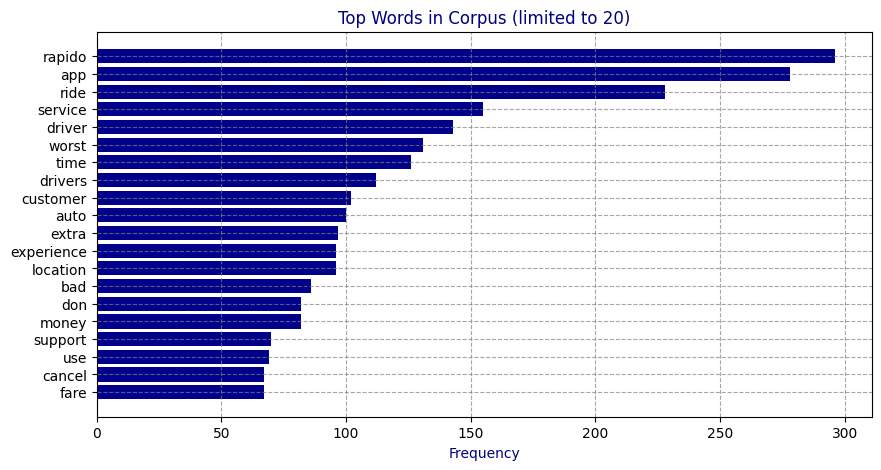

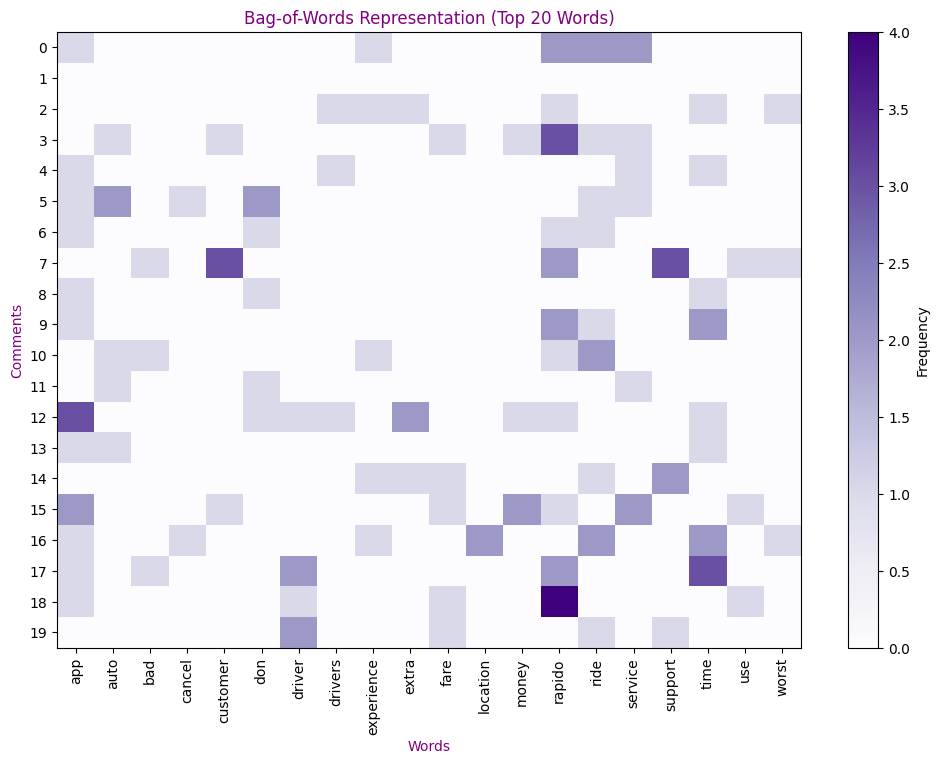

C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\1616027237.py:60: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')


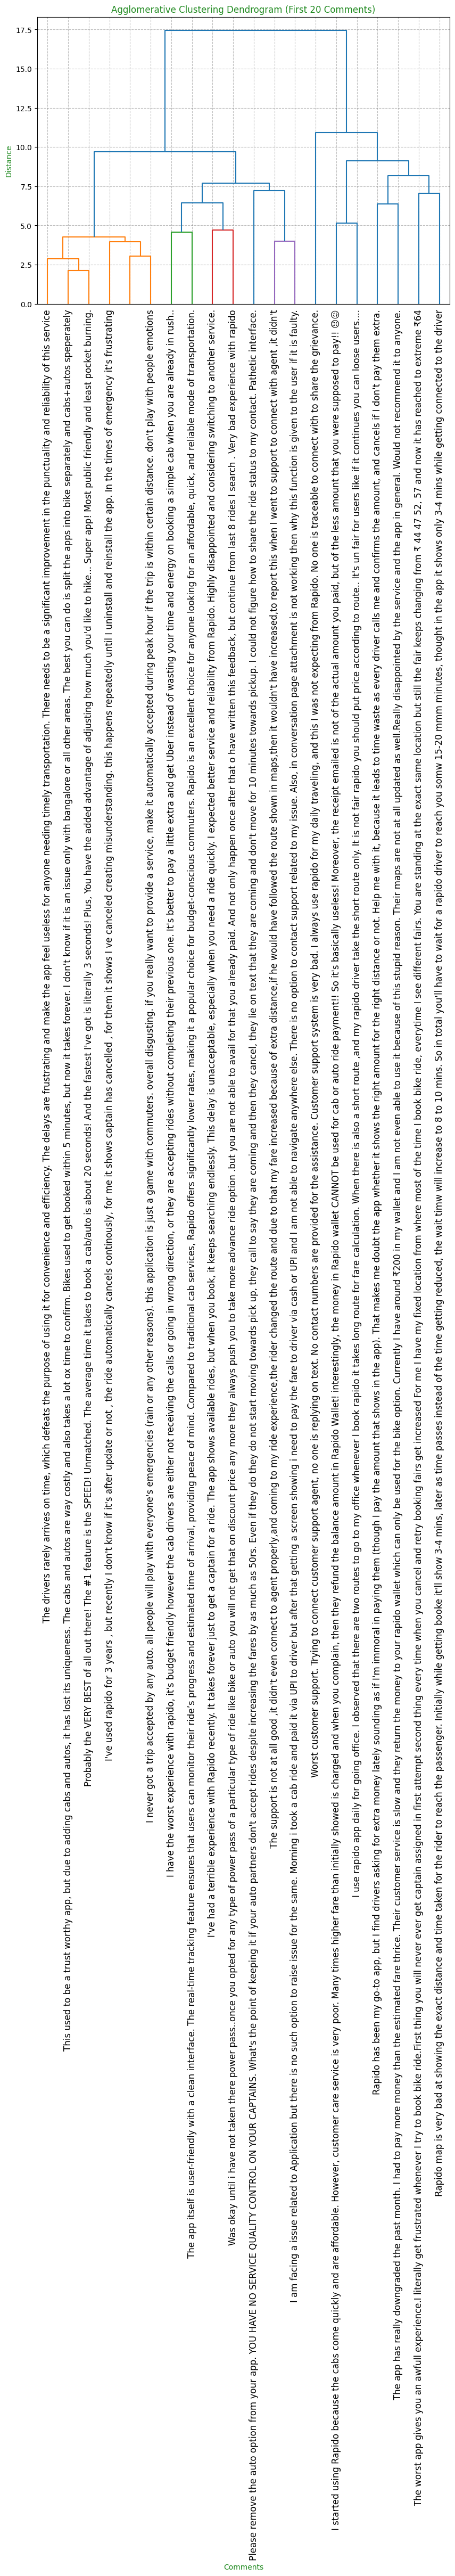

C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\1616027237.py:71: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')


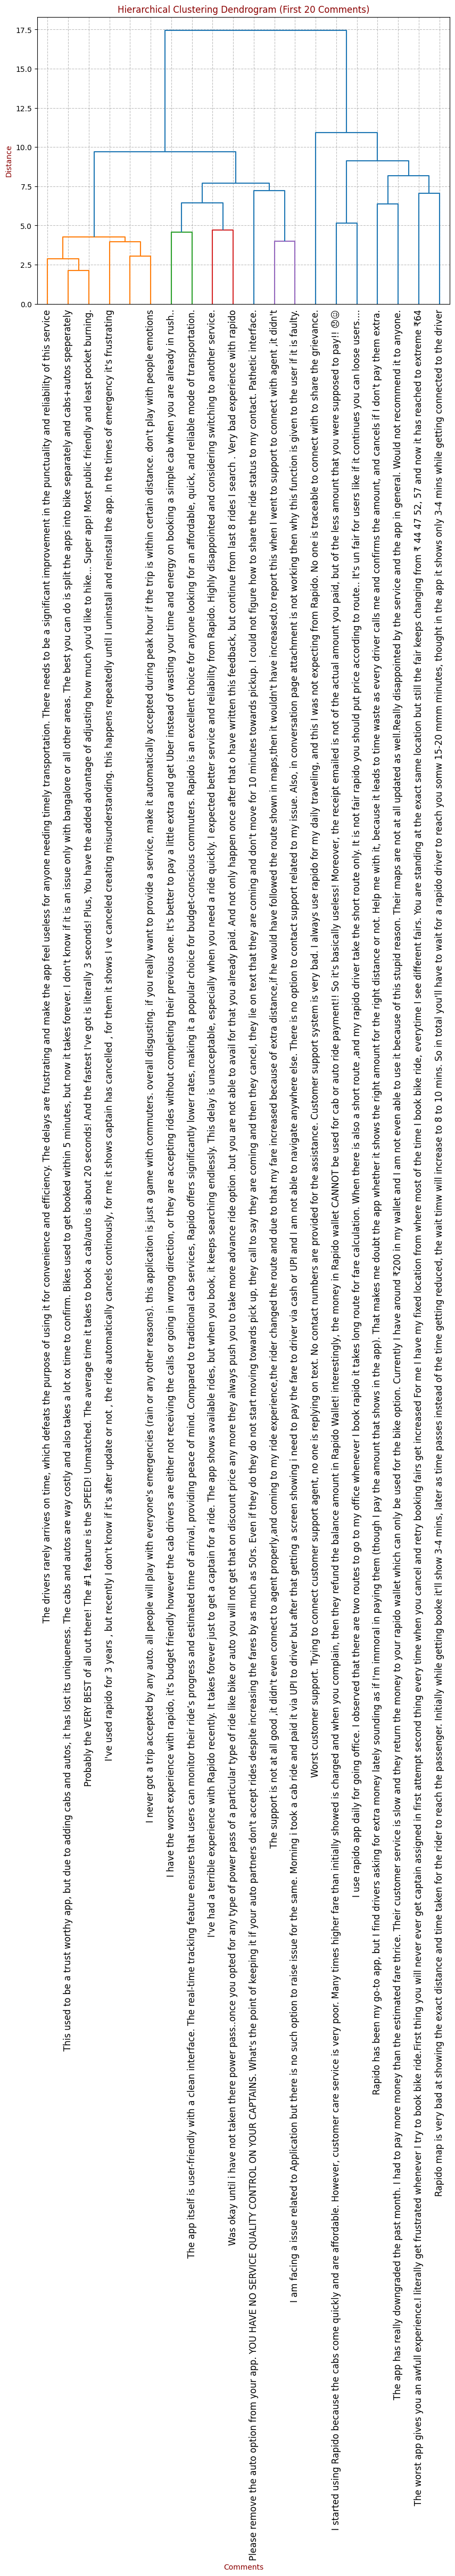

                                              Comment  agglo_cluster  \
0   I've had a terrible experience with Rapido rec...            3.0   
1                                                                1.0   
2   I have the worst experience with rapido, it's ...            2.0   
3   I started using Rapido because the cabs come q...            6.0   
4   The drivers rarely arrives on time, which defe...            1.0   
5   Please remove the auto option from your app. Y...            5.0   
6   I've used rapido for 3 years , but recently I ...            1.0   
7   Worst customer support. Trying to connect cust...           12.0   
8   This used to be a trust worthy app, but due to...            1.0   
9   The app itself is user-friendly with a clean i...            2.0   
10  Was okay until i have not taken there power pa...            3.0   
11  I never got a trip accepted by any auto. all p...            1.0   
12  Rapido has been my go-to app, but I find drive...           

In [3]:
#Part 1.2(Text Clustering and Visualization Using Bag-of-Words and Hierarchical Methods) for Rapido dataset
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel(r"C:\Users\prabi\OneDrive\Desktop\V sem\FDS_project\Datasets\Rapido1.xlsx")  # Replace with your actual file path

# Step 2: Handle NaN values in 'Comment' column
df['Comment'] = df['Comment'].fillna('')  # Replacing NaN with empty string

# Step 3: Create a bag-of-words representation (limit to the top 20 words)
comments = df['Comment']  # Assuming your comments are in a column named 'Comment'
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Limit to top 20 words
X = vectorizer.fit_transform(comments)

# Step 4: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization (limit to 20 words) ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(20)

# Plot top words with a new color scheme (Dark Blue palette)
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='darkblue')
plt.xlabel('Frequency', color='navy')
plt.title('Top Words in Corpus (limited to 20)', color='navy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity
plt.show()

# --- Bag-of-Words Visualization (limit to 20 words) ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df[:20], cmap='Purples', aspect='auto')  # Change color to purple shades
plt.colorbar(label='Frequency', orientation='vertical')
plt.title('Bag-of-Words Representation (Top 20 Words)', color='purple')
plt.xlabel('Words', color='purple')
plt.ylabel('Comments', color='purple')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(20), labels=df.index[:20])  # Limit to first 20 comments
plt.grid(False)  # Remove grid for this plot
plt.show()

# --- Agglomerative Clustering ---
# Step 5: Perform Agglomerative Clustering (use first 20 comments to reduce graph size)
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances[:20, :20])  # Limit clustering to first 20 comments

# Step 6: Plot Dendrogram for Agglomerative Clustering (first 20 comments)
linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Agglomerative Clustering Dendrogram (First 20 Comments)', color='forestgreen')
plt.xlabel('Comments', color='forestgreen')
plt.ylabel('Distance', color='forestgreen')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# --- Hierarchical Clustering ---
# Step 7: Perform Hierarchical Clustering and plot dendrogram (first 20 comments)
linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (First 20 Comments)', color='darkred')
plt.xlabel('Comments', color='darkred')
plt.ylabel('Distance', color='darkred')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = np.nan
df['hierarchical_cluster'] = np.nan

# Fill the cluster labels for the first 20 comments
df.loc[:19, 'agglo_cluster'] = clusters_agglo
df.loc[:19, 'hierarchical_cluster'] = clusters_hierarchical

# Print out the comments with their corresponding cluster labels for the first 20
print(df[['Comment', 'agglo_cluster', 'hierarchical_cluster']].head(20))


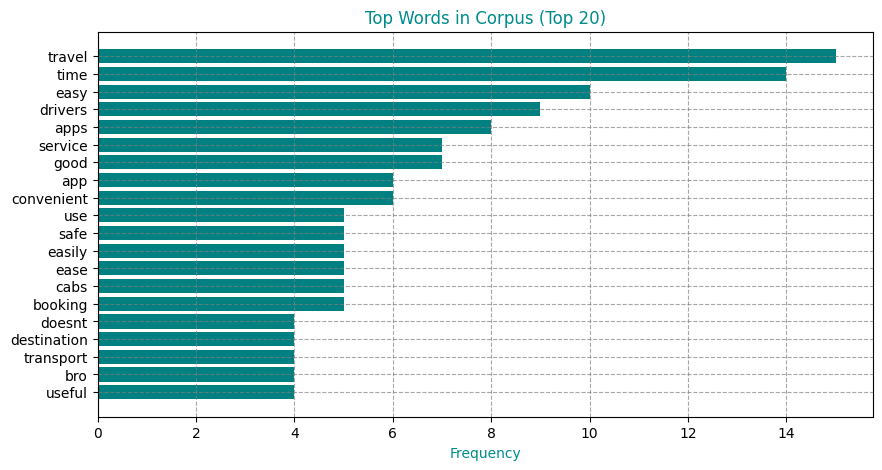

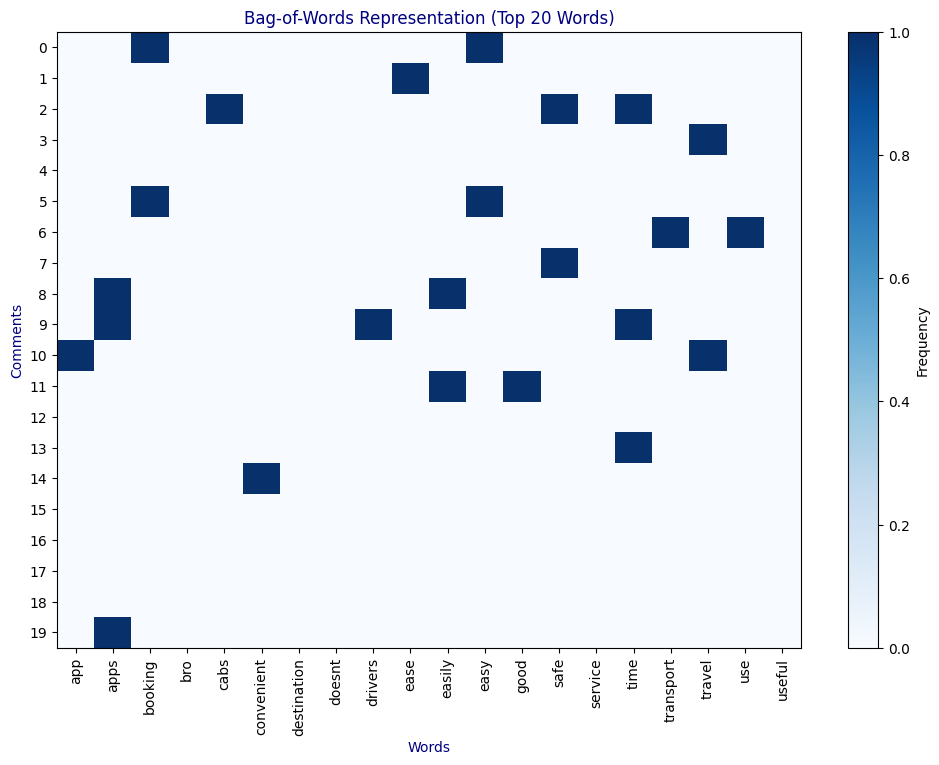

C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\3011380651.py:59: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')
C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


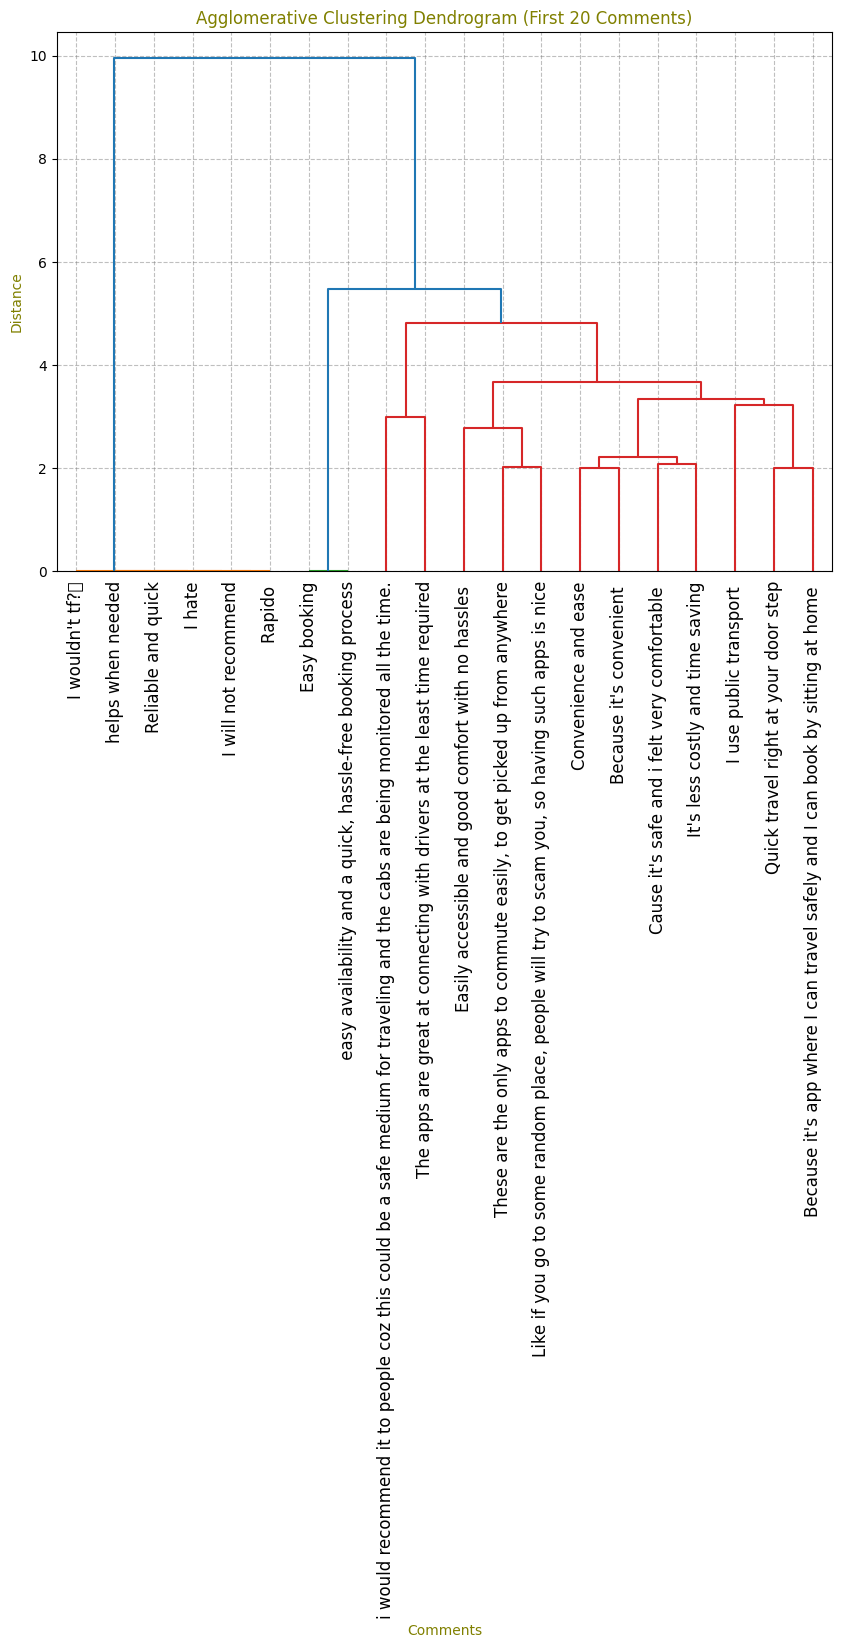

C:\Users\prabi\AppData\Local\Temp\ipykernel_29360\3011380651.py:70: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')
C:\Users\prabi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


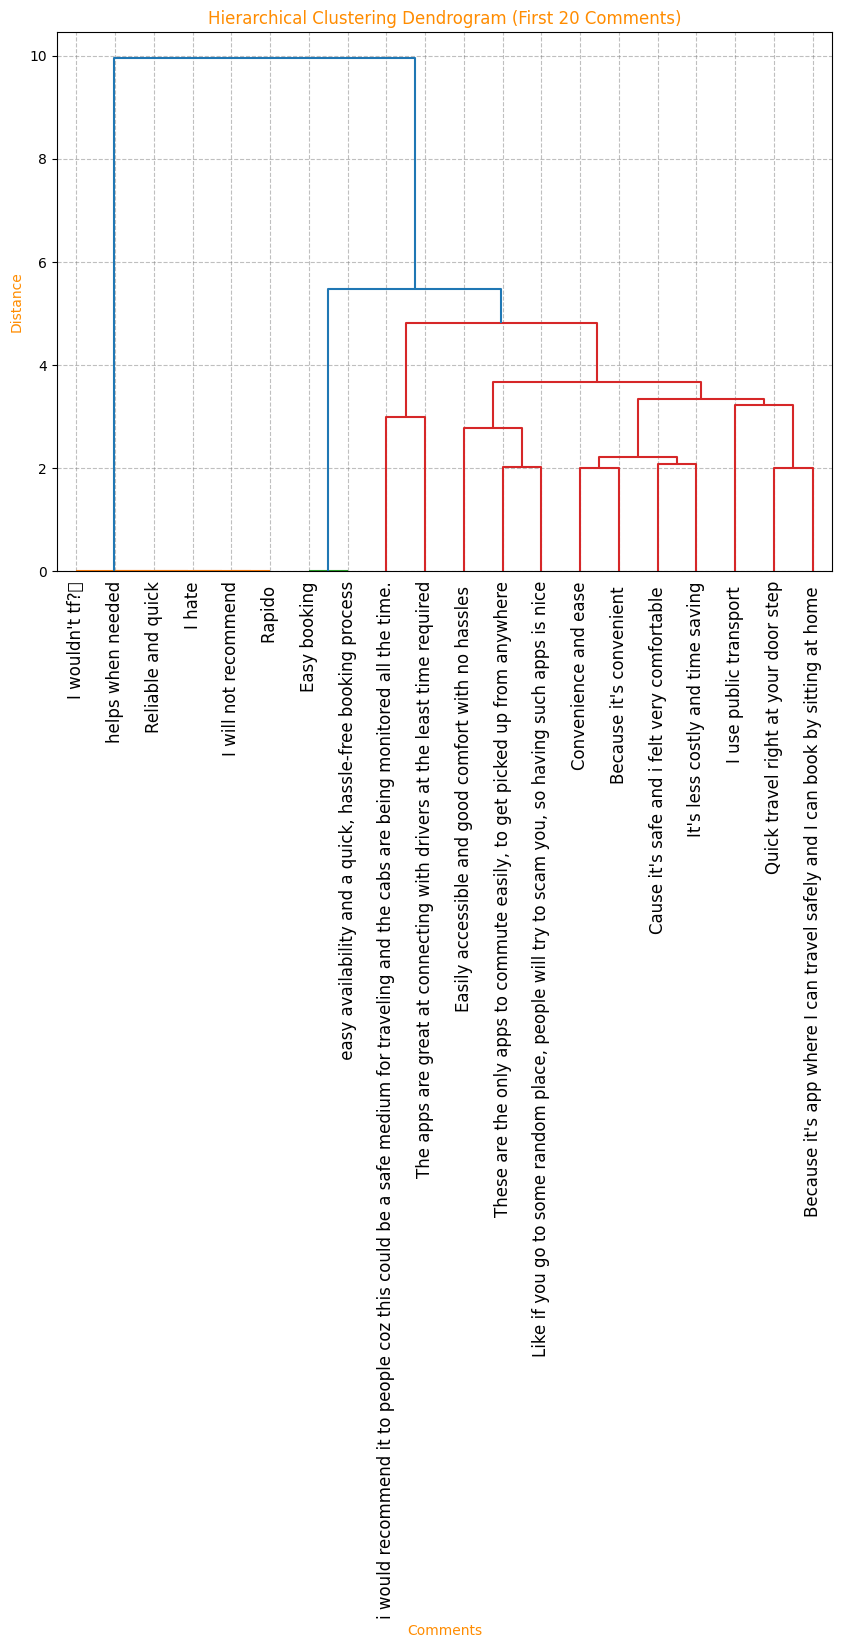

           Please explain why you would recommend it?  agglo_cluster  \
0                                        Easy booking            2.0   
1                                Convenience and ease            3.0   
2   i would recommend it to people coz this could ...            3.0   
3                Quick travel right at your door step            3.0   
4                                I will not recommend            1.0   
5    easy availability and a quick, hassle-free bo...            2.0   
6                             I use public transport             3.0   
7        Cause it's safe and i felt very comfortable             3.0   
8   These are the only apps to commute easily, to ...            3.0   
9   The apps are great at connecting with drivers ...            3.0   
10  Because it's app where I can travel safely and...            3.0   
11  Easily accessible and good comfort with no has...            3.0   
12                                            Rapido            

In [4]:
# Part 1.2(Feedback Clustering and Visualization Using Bag-of-Words and Dendrograms) for Special Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel(r"C:\Users\prabi\OneDrive\Desktop\V sem\FDS_project\Datasets\Special.xlsx")  # Replace with your actual file path

# Step 2: Handle NaN values in 'Please explain why you would recommend it?' column
df['Please explain why you would recommend it?'] = df['Please explain why you would recommend it?'].fillna('')  # Replacing NaN with empty string

# Step 3: Create a bag-of-words representation (limited to top 20)
comments = df['Please explain why you would recommend it?']  # Assuming your comments are in this column
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Limit to top 20 words
X = vectorizer.fit_transform(comments)

# Step 4: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization (limited to 20 words) ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(20)

# Plot top words with a new color scheme (Teal palette)
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='teal')
plt.xlabel('Frequency', color='darkcyan')
plt.title('Top Words in Corpus (Top 20)', color='darkcyan')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.grid(True, linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity
plt.show()

# --- Bag-of-Words Visualization (limited to top 20 words) ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df[:20], cmap='Blues', aspect='auto')  # Change color to blue shades
plt.colorbar(label='Frequency', orientation='vertical')
plt.title('Bag-of-Words Representation (Top 20 Words)', color='navy')
plt.xlabel('Words', color='navy')
plt.ylabel('Comments', color='navy')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(20), labels=df.index[:20])  # Limit to first 20 comments
plt.grid(False)  # Remove grid for this plot
plt.show()

# --- Agglomerative Clustering (limited to top 20 comments) ---
# Step 5: Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances[:20, :20])  # Limit clustering to first 20 comments

# Step 6: Plot Dendrogram for Agglomerative Clustering (first 20 comments)
linkage_matrix_agglo = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Agglomerative Clustering Dendrogram (First 20 Comments)', color='olive')
plt.xlabel('Comments', color='olive')
plt.ylabel('Distance', color='olive')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# --- Hierarchical Clustering (limited to top 20 comments) ---
# Step 7: Perform Hierarchical Clustering and plot dendrogram
linkage_matrix_hierarchical = linkage(distances[:20, :20], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values[:20], leaf_rotation=90, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (First 20 Comments)', color='darkorange')
plt.xlabel('Comments', color='darkorange')
plt.ylabel('Distance', color='darkorange')
plt.grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid for clarity
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = np.nan
df['hierarchical_cluster'] = np.nan

# Fill the cluster labels for the first 20 comments
df.loc[:19, 'agglo_cluster'] = clusters_agglo
df.loc[:19, 'hierarchical_cluster'] = clusters_hierarchical

# Print out the comments with their corresponding cluster labels for the first 20
print(df[['Please explain why you would recommend it?', 'agglo_cluster', 'hierarchical_cluster']].head(20))
